In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import tensorflow as tf
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
import matplotlib.font_manager as fm 

font_fname = 'C:/Windows/Fonts/Malgun.ttf' #적용할 폰트
font_family = fm.FontProperties(fname=font_fname).get_name() #폰트 설정
plt.rcParams["font.family"] = font_family  #폰트 적용

In [3]:
# 부호 오류 고치기 코드
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
os.chdir(r"C:\Users\user\project\2021 빅데이터 경진대회")

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'C:\\Users\\user\\project\\2021 빅데이터 경진대회'

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# raw = pd.read_csv('공기압축기_선박엔진.csv')
# raw = raw.iloc[:,3:]

In [7]:
# raw.drop('SVC_NAME',axis=1, inplace = True)
# raw.drop('DEVICE_BD_ID',axis=1, inplace = True)
# raw.drop('ESTABLISH_YEAR',axis=1, inplace = True)
# raw.drop('LOCATION',axis=1, inplace = True)
# raw.drop('COMPANY_TYPE',axis=1, inplace = True)
# raw.drop('COMPANY_CAT',axis=1, inplace = True)
# raw.drop('MAJOR_PRODUCT',axis=1, inplace = True)
# raw.drop('CONTRACT_POWER',axis=1, inplace = True)

In [8]:
# raw = raw[raw['COMPANY_NAME']=='CO-296']

In [9]:
# raw['facility_name'].value_counts()

In [10]:
# one = raw[raw['facility_name']=='컴프레서_1']
# two = raw[raw['facility_name']=='컴프레서_2']
# three = raw[raw['facility_name']=='컴프레서_3']

In [11]:
# col = ['전류평균', '온도', '선간전압평균', '상전압평균', '유효전력평균', '누적전력량', '전류고조파평균', '역률평균', '주파수', '전압고조파평균', '무효전력평균']
# one_df = one[one['ITEM_NAME']==col[0]].iloc[:,:-6]
# for i in range(0,len(col)) : 
#     values = list(one[one['ITEM_NAME']==col[i]]['ITEM_VALUE'])
#     one_df[col[i]] = values

# one_df['TIMESTAMP'] = list(one[one['ITEM_NAME']==col[0]].iloc[:,-4])
# one_df['역률평균_LABEL'] = list(one[one['ITEM_NAME']==col[0]].iloc[:,-3])
# one_df['전압고조파평균_LABEL'] = list(one[one['ITEM_NAME']==col[0]].iloc[:,-1])

In [12]:
# one_df

In [13]:
# one_df.columns

In [14]:
# onedf = one_df[['전압고조파평균','전류평균','온도','TIMESTAMP', '역률평균']]

In [15]:
# onedf['TIME'] = pd.to_datetime(onedf['TIMESTAMP'])
# onedf.drop('TIMESTAMP', axis = 1, inplace=True)
# onedf.set_index('TIME', inplace=True)

In [16]:
# onedf.shape

In [17]:
# onedf.plot()

# 데이터 가공

In [5]:
comp_1_one=pd.read_csv('pump1_concat.csv')

TRAIN_SPLIT = 63360

In [6]:
comp_1_one.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
comp_1_one['TIMESTAMP'] = pd.to_datetime(comp_1_one['TIME'])
comp_1_one.drop('TIME', axis = 1, inplace=True)
comp_1_one.set_index('TIMESTAMP', inplace=True)

In [8]:
comp_1_one

,전류평균,온도,선간전압평균,상전압평균,유효전력평균,누적전력량,역률평균,주파수,전압고조파평균,무효전력평균
TIMESTAMP,,,,,,,,,,
2020-10-07 00:00:00,0.0,16.875,384.583,221.917,0.0,44759.500,0.0,59.901,5.729,0.0
2020-10-07 00:01:00,0.0,17.500,384.000,221.500,0.0,44759.500,0.0,59.891,5.632,0.0
2020-10-07 00:02:00,0.0,16.250,384.833,222.000,0.0,44759.500,0.0,59.957,5.729,0.0
2020-10-07 00:03:00,0.0,17.500,384.000,221.667,0.0,44759.500,0.0,59.901,5.957,0.0
2020-10-07 00:04:00,0.0,16.875,384.167,221.667,0.0,44759.500,0.0,59.929,6.250,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-11-24 23:55:08,0.0,2.500,0.000,0.000,0.0,133013.141,0.0,0.000,0.000,0.0
2020-11-24 23:56:08,0.0,2.500,0.000,0.000,0.0,133013.141,0.0,0.000,0.000,0.0
2020-11-24 23:57:08,0.0,2.500,0.000,0.000,0.0,133013.141,0.0,0.000,0.000,0.0


In [9]:
DATE = comp_1_one.index

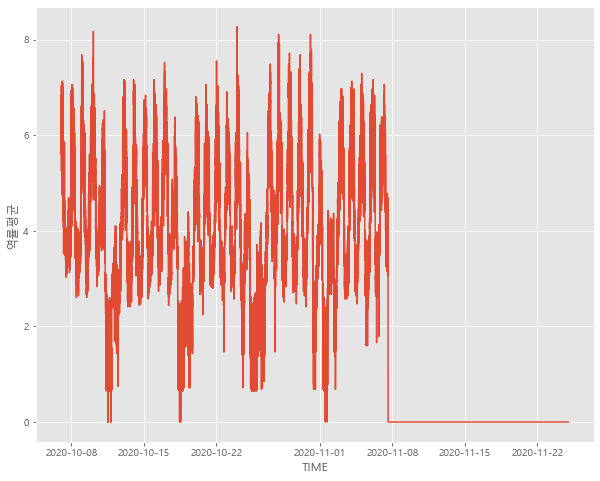

In [11]:
## 전압고조파평균 시계열 그래프 시각화

plt.figure(figsize=(10,8))
plt.plot(comp_1_one.index,comp_1_one.전압고조파평균)
plt.xlabel('TIME')
plt.ylabel('역률평균')
plt.show()

In [12]:
comp_1_one = comp_1_one[:63360]

In [13]:
comp_1_one

,전류평균,온도,선간전압평균,상전압평균,유효전력평균,누적전력량,역률평균,주파수,전압고조파평균,무효전력평균
TIMESTAMP,,,,,,,,,,
2020-10-07 00:00:00,0.0,16.875,384.583,221.917,0.0,44759.500,0.0,59.901,5.729,0.0
2020-10-07 00:01:00,0.0,17.500,384.000,221.500,0.0,44759.500,0.0,59.891,5.632,0.0
2020-10-07 00:02:00,0.0,16.250,384.833,222.000,0.0,44759.500,0.0,59.957,5.729,0.0
2020-10-07 00:03:00,0.0,17.500,384.000,221.667,0.0,44759.500,0.0,59.901,5.957,0.0
2020-10-07 00:04:00,0.0,16.875,384.167,221.667,0.0,44759.500,0.0,59.929,6.250,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-11-19 23:55:08,0.0,13.750,0.000,0.000,0.0,133013.141,0.0,0.000,0.000,0.0
2020-11-19 23:56:08,0.0,14.375,0.000,0.000,0.0,133013.141,0.0,0.000,0.000,0.0
2020-11-19 23:57:08,0.0,15.000,0.000,0.000,0.0,133013.141,0.0,0.000,0.000,0.0


In [14]:
comp_1_one = comp_1_one.values
comp_1_one_mean = comp_1_one[:TRAIN_SPLIT].mean(axis=0)
comp_1_one_std = comp_1_one[:TRAIN_SPLIT].std(axis=0)
comp_1_one = (comp_1_one-comp_1_one_mean)/comp_1_one_std
print(comp_1_one)

[[-0.51031191  0.69213365  0.67797262 ...  0.62651113  1.27488268
  -0.52857482]
 [-0.51031191  0.82291028  0.67452874 ...  0.62614033  1.2305261
  -0.52857482]
 [-0.51031191  0.56135702  0.67944941 ...  0.62858762  1.27488268
  -0.52857482]
 ...
 [-0.51031191  0.29980377 -1.5938252  ... -1.59462503 -1.34489917
  -0.52857482]
 [-0.51031191  0.16902714 -1.5938252  ... -1.59462503 -1.34489917
  -0.52857482]
 [-0.51031191  0.16902714 -1.5938252  ... -1.59462503 -1.34489917
  -0.52857482]]


<AxesSubplot:>

<Figure size 1440x576 with 0 Axes>

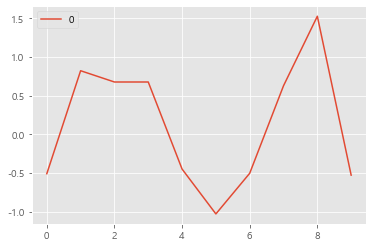

In [16]:
fig = plt.figure(figsize = (20, 8))
pd.DataFrame(comp_1_one[6])[:2000].plot()

<ipython-input-17-6bad14720988>:2: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



<Figure size 432x288 with 0 Axes>

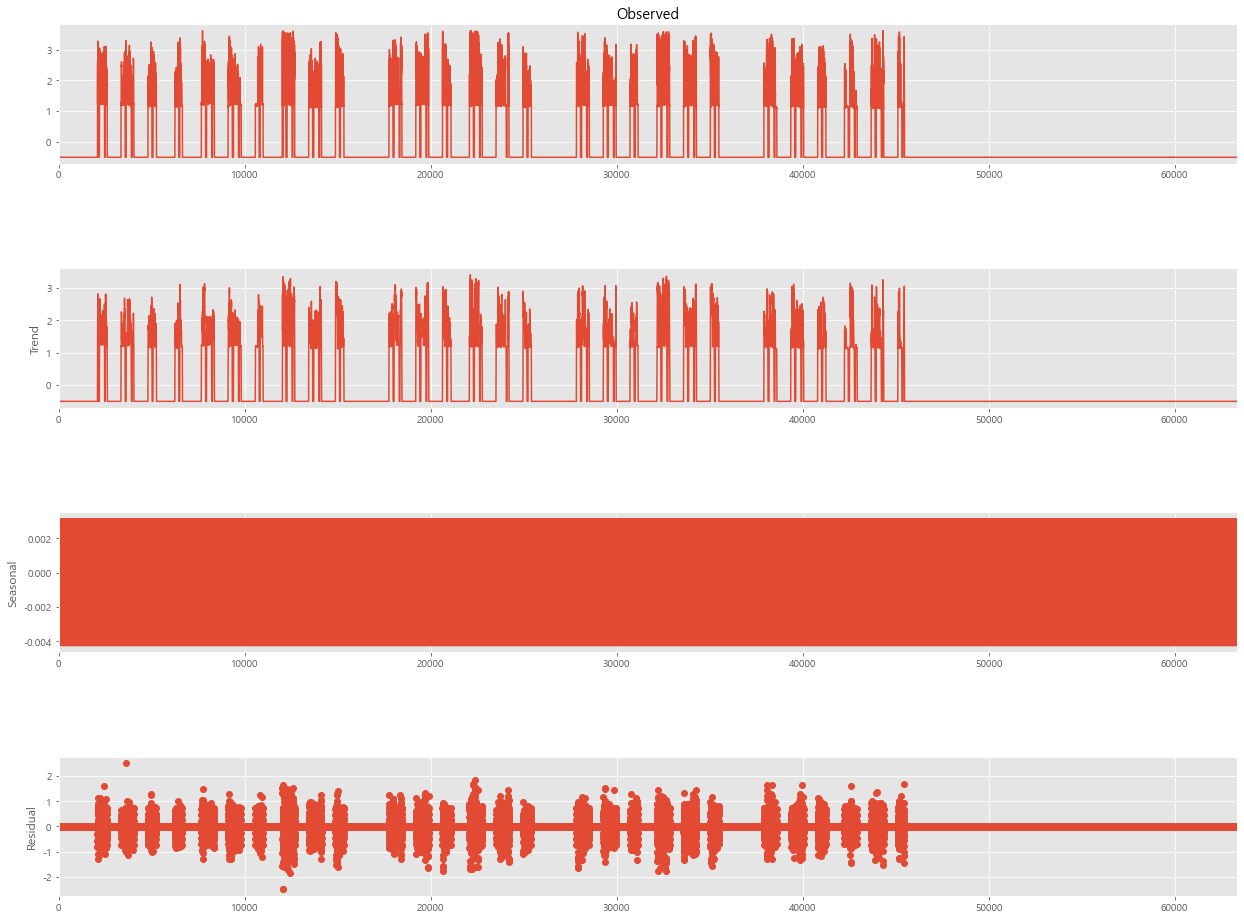

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(comp_1_one[:, 6], model = 'additive', freq = 7)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20, 15)

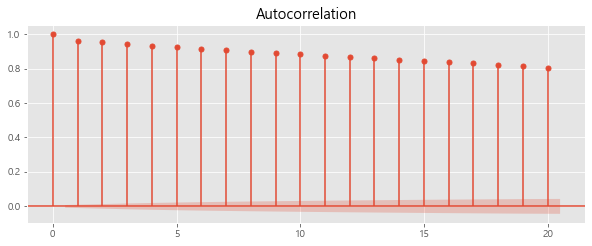

In [18]:
## 데이터가 패턴이 보인다면? -> 정상성이 의심됨 -> 판단하기 위한 ACF 그래프 시각화
import statsmodels.api as sm

fig=plt.figure(figsize=(10,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(comp_1_one[:, 6],lags=20,ax=ax1)

## 값이 아주 천천히 작아짐 -> ACF값이 천천히 감소하는 것은 정상성을 만족하지 않는다는 것을 의미

In [19]:
### ADF 검정(Augmented Dickey-Fuller test) / 단위근 검정 으로 정상성 확인
# H0(귀무가설) : 자료에 단위근이 존재한다. 즉, 정상성을 만족하지 않는다.
# H1(대립가설) : 자료가 정상성을 만족한다.

from statsmodels.tsa.stattools import adfuller

result=adfuller(comp_1_one[:, 6])
print('ADF Statistic : %f ' % result[0])
print('p-value : %f' % result[1])
print('Critical Values:')

for key,value in result[4].items():
    print('\t%s : %.3f' % (key,value))

ADF Statistic : -15.367692 
p-value : 0.000000
Critical Values:
	1% : -3.430
	5% : -2.862
	10% : -2.567


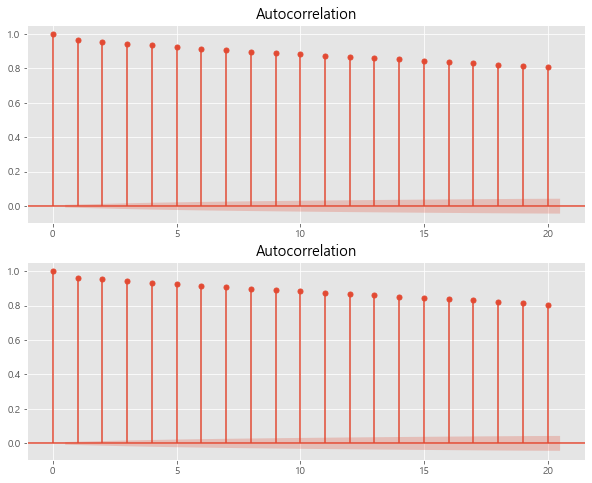

In [20]:
## 정상성을 만족하는 데이터도 ACF와 PACF 그래프를 그려 ARIMA 모형의 p와 q를 결정

import statsmodels.api as sm

fig=plt.figure(figsize=(10,8))

ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(comp_1_one[:, 6],lags=20,ax=ax1)

ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_acf(comp_1_one[:, 6],lags=20,ax=ax2)

In [21]:
comp_1_one = pd.DataFrame(comp_1_one)

In [22]:
comp_1_one.index = DATE[:63360]

In [23]:
comp_1_one

,0,1,2,3,4,5,6,7,8,9
TIMESTAMP,,,,,,,,,,
2020-10-07 00:00:00,-0.510312,0.692134,0.677973,0.680385,-0.449915,-1.030789,-0.504794,0.626511,1.274883,-0.528575
2020-10-07 00:01:00,-0.510312,0.822910,0.674529,0.676112,-0.449915,-1.030789,-0.504794,0.626140,1.230526,-0.528575
2020-10-07 00:02:00,-0.510312,0.561357,0.679449,0.681235,-0.449915,-1.030789,-0.504794,0.628588,1.274883,-0.528575
2020-10-07 00:03:00,-0.510312,0.822910,0.674529,0.677823,-0.449915,-1.030789,-0.504794,0.626511,1.379144,-0.528575
2020-10-07 00:04:00,-0.510312,0.692134,0.675515,0.677823,-0.449915,-1.030789,-0.504794,0.627549,1.513128,-0.528575
...,...,...,...,...,...,...,...,...,...,...
2020-11-19 23:55:08,-0.510312,0.038251,-1.593825,-1.593738,-0.449915,-0.082697,-0.504794,-1.594625,-1.344899,-0.528575
2020-11-19 23:56:08,-0.510312,0.169027,-1.593825,-1.593738,-0.449915,-0.082697,-0.504794,-1.594625,-1.344899,-0.528575
2020-11-19 23:57:08,-0.510312,0.299804,-1.593825,-1.593738,-0.449915,-0.082697,-0.504794,-1.594625,-1.344899,-0.528575


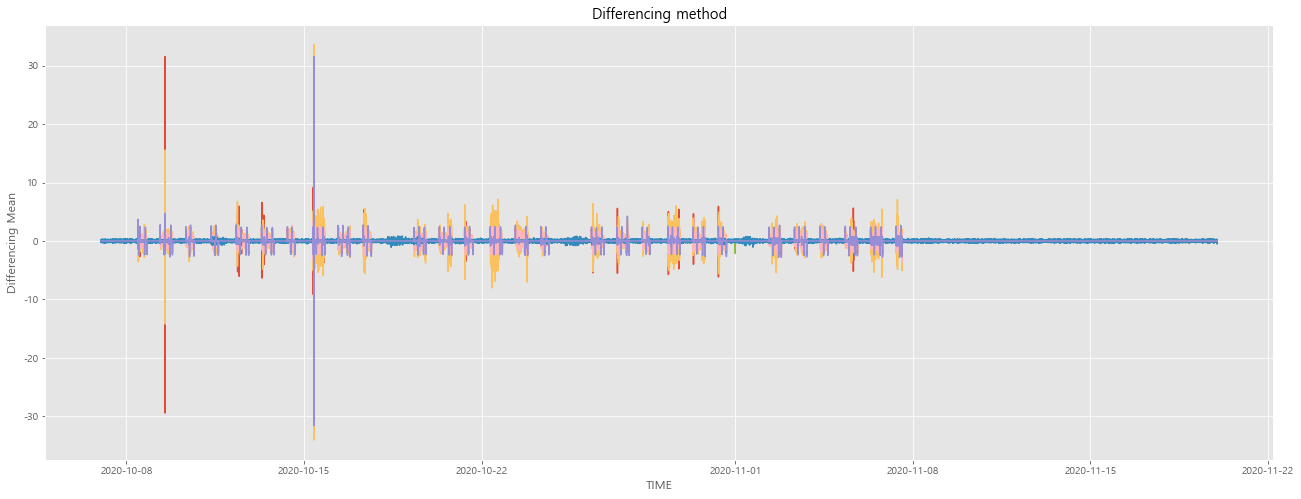

In [24]:
## 정상성을 해결하기 위한 1차 차분

comp_diff = comp_1_one - comp_1_one.shift()
plt.figure(figsize=(22,8))
plt.plot(comp_diff)
plt.title('Differencing method')
plt.xlabel('TIME')
plt.ylabel('Differencing Mean')
plt.show()

In [75]:
# ### ADF 검정(Augmented Dickey-Fuller test) / 단위근 검정 으로 정상성 확인

# from statsmodels.tsa.stattools import adfuller

# result=adfuller(ts_diff[1:])
# print('ADF Statistic : %f ' % result[0])
# print('p-value : %f' % result[1])
# print('Critical Values:')

# for key,value in result[4].items():
#     print('\t%s : %.3f' % (key,value))

In [76]:
# ## 정상성을 만족하는 데이터도 ACF와 PACF 그래프를 그려 ARIMA 모형의 p와 q를 결정

# import statsmodels.api as sm

# fig=plt.figure(figsize=(10,8))

# ax1=fig.add_subplot(211)
# fig=sm.graphics.tsa.plot_acf(ts_diff[1:],lags=20,ax=ax1)

# ax2=fig.add_subplot(212)
# fig=sm.graphics.tsa.plot_acf(ts_diff[1:],lags=20,ax=ax2)

In [25]:
comp_1_one = comp_diff.values

In [26]:
comp_1_one.shape

(63360, 10)

In [27]:
comp_1_one = pd.DataFrame(comp_1_one)

In [28]:
comp_1_one.index = DATE[:63360]

In [29]:
comp_1_one = comp_1_one[1:]

In [30]:
comp_1_one

,0,1,2,3,4,5,6,7,8,9
TIMESTAMP,,,,,,,,,,
2020-10-07 00:01:00,0.0,0.130777,-0.003444,-0.004273,0.0,0.0,0.0,-0.000371,-0.044357,0.0
2020-10-07 00:02:00,0.0,-0.261553,0.004921,0.005124,0.0,0.0,0.0,0.002447,0.044357,0.0
2020-10-07 00:03:00,0.0,0.261553,-0.004921,-0.003412,0.0,0.0,0.0,-0.002076,0.104261,0.0
2020-10-07 00:04:00,0.0,-0.130777,0.000986,0.000000,0.0,0.0,0.0,0.001038,0.133984,0.0
2020-10-07 00:05:00,0.0,0.000000,0.000981,-0.001711,0.0,0.0,0.0,0.000000,0.089170,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-11-19 23:55:08,0.0,-0.130777,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
2020-11-19 23:56:08,0.0,0.130777,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
2020-11-19 23:57:08,0.0,0.130777,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


# VAR

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm

In [32]:
# #차분을 이용한 추세제거
# onedf.diff(1).dropna().plot(subplots=True, figsize=(12,5))
# plt.tight_layout()
# plt.show()

In [33]:
# VAR 모형적합
fit = sm.tsa.VAR(comp_1_one).fit(maxlags=2) #var2 모형 (2단위시간 전까지 값을 사용, Y_t=A1*Y_t-1+A2*Y_t-2+e_t, k=3)
display(fit.summary())

C:\Users\82109\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 10, Sep, 2021
Time:                     20:39:29
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -65.3041
Nobs:                     63357.0    HQIC:                  -65.3248
Log likelihood:       1.17090e+06    FPE:                4.22447e-29
AIC:                     -65.3341    Det(Omega_mle):     4.21050e-29
--------------------------------------------------------------------
Results for equation 0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.000023         0.001227            0.019           0.985
L1.0         -0.613277         0.007194          -85.254           0.000
L1.1          0.020899         0.010976            1.904           0.057
L1.2         -0.857620 

In [89]:
# # VAR 모형적합
# raw_use_return = onedf.diff(1).dropna()
# fit = sm.tsa.VAR(raw_use_return).fit(maxlags=2) #var2 모형 (2단위시간 전까지 값을 사용, Y_t=A1*Y_t-1+A2*Y_t-2+e_t, k=3)
# display(fit.summary())

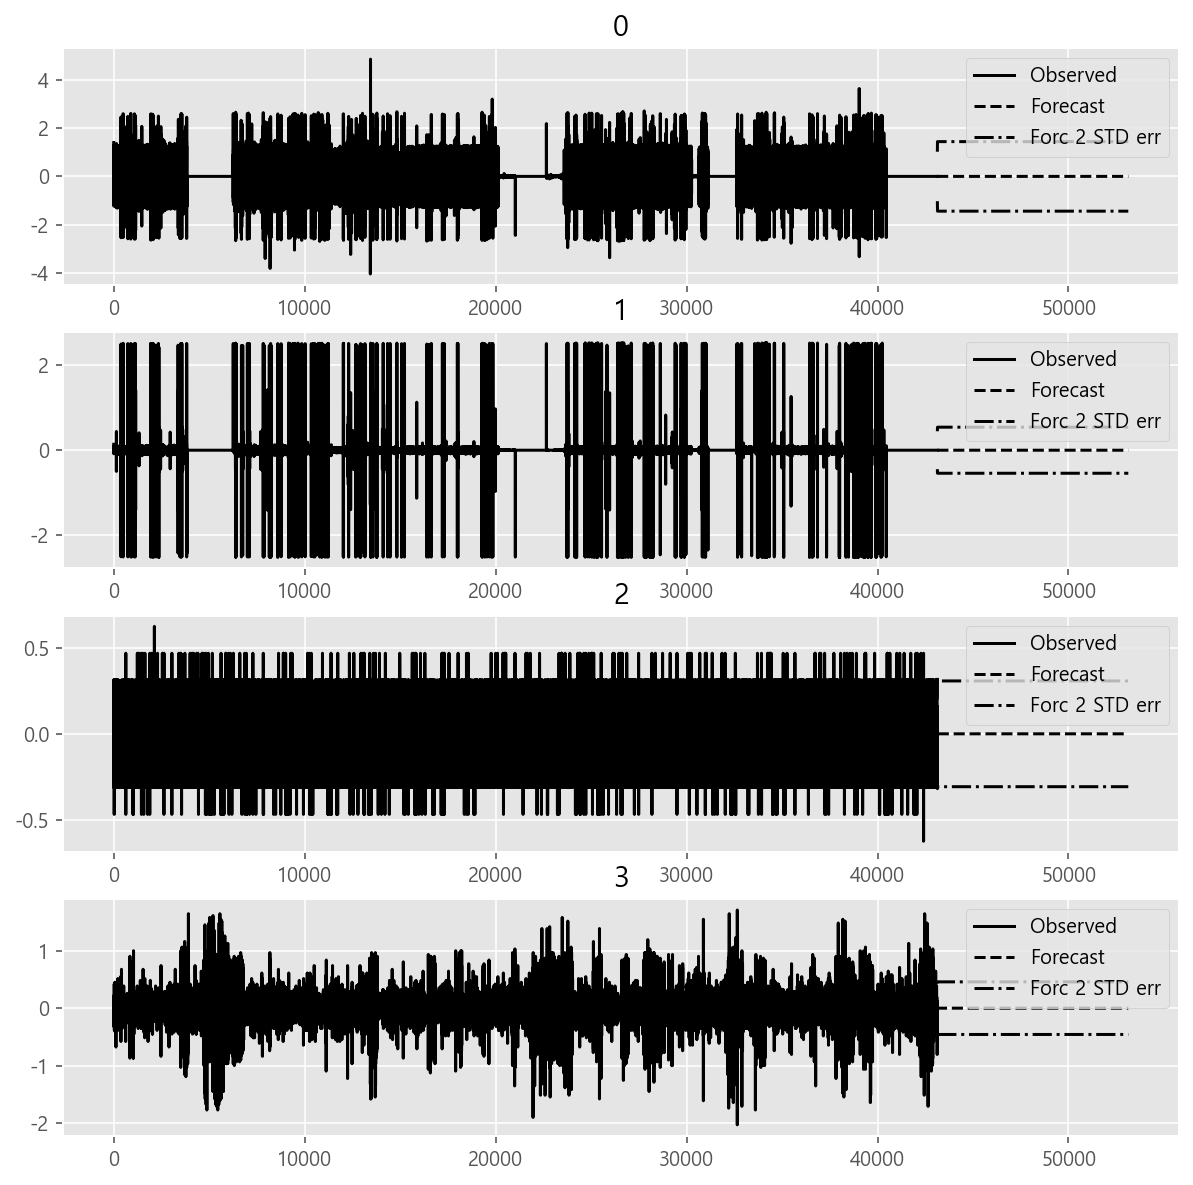

In [90]:
# # 예측 및 시각화
forecast_num = 10000

# 구간추정
# pred_var = fit.forecast(fit.model.endog[-1:], steps=forecast_num)
# pred_var_ci = fit.forecast_interval(fit.model.endog[-1:], steps=forecast_num)

fit.plot_forecast(forecast_num) 
# plt.tight_layout()
plt.show()

# LSTM

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pandas import DataFrame , concat
from sklearn.metrics import mean_absolute_error , mean_squared_error
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from numpy import mean , concatenate
from math import sqrt
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf

In [61]:
comp_1_one

,0,1,2,3,4,5,6,7,8,9
TIMESTAMP,,,,,,,,,,
2020-10-07 00:01:00,0.0,0.130777,-0.003444,-0.004273,0.0,0.0,0.0,-0.000371,-0.044357,0.0
2020-10-07 00:02:00,0.0,-0.261553,0.004921,0.005124,0.0,0.0,0.0,0.002447,0.044357,0.0
2020-10-07 00:03:00,0.0,0.261553,-0.004921,-0.003412,0.0,0.0,0.0,-0.002076,0.104261,0.0
2020-10-07 00:04:00,0.0,-0.130777,0.000986,0.000000,0.0,0.0,0.0,0.001038,0.133984,0.0
2020-10-07 00:05:00,0.0,0.000000,0.000981,-0.001711,0.0,0.0,0.0,0.000000,0.089170,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-11-19 23:55:08,0.0,-0.130777,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
2020-11-19 23:56:08,0.0,0.130777,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
2020-11-19 23:57:08,0.0,0.130777,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


In [62]:
x_1 = comp_1_one[0].values
x_2 = comp_1_one[1].values
x_3 = comp_1_one[2].values
x_4 = comp_1_one[3].values
x_5 = comp_1_one[4].values
x_6 = comp_1_one[5].values
x_7 = comp_1_one[7].values
x_8 = comp_1_one[8].values
x_9 = comp_1_one[9].values
y = comp_1_one[6].values

In [63]:
comp_1_one

,0,1,2,3,4,5,6,7,8,9
TIMESTAMP,,,,,,,,,,
2020-10-07 00:01:00,0.0,0.130777,-0.003444,-0.004273,0.0,0.0,0.0,-0.000371,-0.044357,0.0
2020-10-07 00:02:00,0.0,-0.261553,0.004921,0.005124,0.0,0.0,0.0,0.002447,0.044357,0.0
2020-10-07 00:03:00,0.0,0.261553,-0.004921,-0.003412,0.0,0.0,0.0,-0.002076,0.104261,0.0
2020-10-07 00:04:00,0.0,-0.130777,0.000986,0.000000,0.0,0.0,0.0,0.001038,0.133984,0.0
2020-10-07 00:05:00,0.0,0.000000,0.000981,-0.001711,0.0,0.0,0.0,0.000000,0.089170,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-11-19 23:55:08,0.0,-0.130777,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
2020-11-19 23:56:08,0.0,0.130777,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
2020-11-19 23:57:08,0.0,0.130777,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


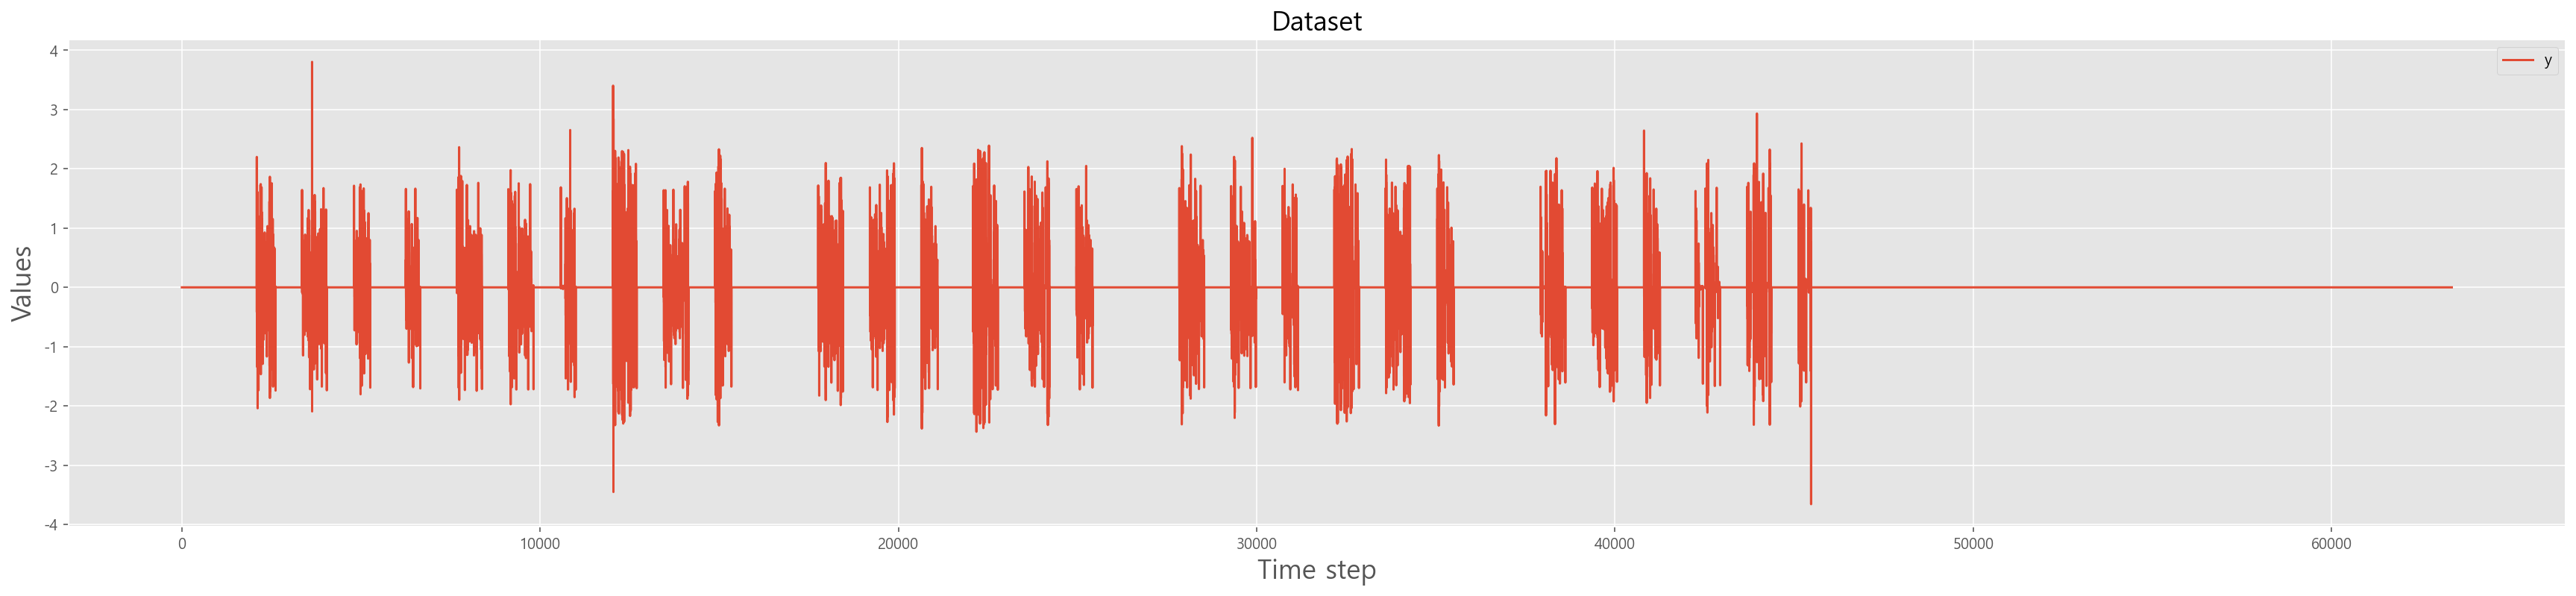

In [64]:
plt.figure(figsize=(30, 6))
# plt.plot(x_1 , label='x1')
# plt.plot(x_2 , label='x2')
# plt.plot(x_3 , label='x2')
plt.plot(y , label='y')
plt.legend(loc='upper right')
plt.title("Dataset" ,  fontsize=18)
plt.xlabel('Time step' ,  fontsize=18)
plt.ylabel('Values' , fontsize=18)
plt.legend()
plt.show()

In [65]:
# Step 1 : convert to [rows, columns] structure
x_1 = x_1.reshape((len(x_1), 1))
x_2 = x_2.reshape((len(x_2), 1))
x_3 = x_3.reshape((len(x_3), 1))
x_4 = x_3.reshape((len(x_4), 1))
x_5 = x_3.reshape((len(x_5), 1))
x_6 = x_3.reshape((len(x_6), 1))
x_7 = x_3.reshape((len(x_7), 1))
x_8 = x_3.reshape((len(x_8), 1))
x_9 = x_3.reshape((len(x_9), 1))
y = y.reshape((len(y), 1))

In [66]:
print ("x_1.shape" , x_1.shape) 
print ("x_2.shape" , x_2.shape) 
print ("x_3.shape" , x_3.shape) 
print ("y.shape" , y.shape)

x_1.shape (63359, 1)
x_2.shape (63359, 1)
x_3.shape (63359, 1)
y.shape (63359, 1)


In [67]:
# Step 2 : normalization 
scaler = MinMaxScaler(feature_range=(0, 1))
x_1_scaled = scaler.fit_transform(x_1)
x_2_scaled = scaler.fit_transform(x_2)
x_3_scaled = scaler.fit_transform(x_3)
x_4_scaled = scaler.fit_transform(x_4)
x_5_scaled = scaler.fit_transform(x_5)
x_6_scaled = scaler.fit_transform(x_6)
x_7_scaled = scaler.fit_transform(x_7)
x_8_scaled = scaler.fit_transform(x_8)
x_9_scaled = scaler.fit_transform(x_9)
y_scaled = scaler.fit_transform(y)

In [68]:
# Step 3 : horizontally stack columns
dataset_stacked = hstack((x_1_scaled, x_2_scaled, x_3_scaled, x_4_scaled, x_5_scaled, x_6_scaled, x_7_scaled, x_8_scaled, x_9_scaled, y_scaled))
print ("dataset_stacked.shape" , dataset_stacked.shape)

dataset_stacked.shape (63359, 10)


In [69]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
 X, y = list(), list()
 for i in range(len(sequences)):
  # find the end of this pattern
  end_ix = i + n_steps_in
  out_end_ix = end_ix + n_steps_out-1
  # check if we are beyond the dataset
  if out_end_ix > len(sequences):
   break
  # gather input and output parts of the pattern
  seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
  X.append(seq_x)
  y.append(seq_y)
 return array(X), array(y)
# choose a number of time steps #change this accordingly
n_steps_in, n_steps_out = 60 , 30
# covert into input/output
X, y = split_sequences(dataset_stacked, n_steps_in, n_steps_out)
print ("X.shape" , X.shape) 
print ("y.shape" , y.shape)

X.shape (63271, 60, 9)
y.shape (63271, 30)


In [70]:
split_point = 50000
train_X , train_y = X[:split_point, :] , y[:split_point, :]
test_X , test_y = X[split_point:, :] , y[split_point:, :]

In [71]:
#optimizer learning rate
opt = keras.optimizers.Adam(learning_rate=0.0001)
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, 3)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(n_steps_out))
model.add(Activation('linear'))
model.compile(loss='mse' , optimizer=opt , metrics=['mse'])

In [72]:
# Fit network
history = model.fit(train_X , train_y , epochs=5 , steps_per_epoch=25 , verbose=1 ,validation_data=(test_X, test_y) ,shuffle=False)

Epoch 1/5


ValueError: in user code:

    C:\Users\82109\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\82109\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\82109\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\82109\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\82109\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\82109\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\82109\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\82109\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\82109\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:224 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer sequential_2: expected shape=(None, None, 3), found shape=[2000, 60, 9]


##### validation

In [177]:
comp_1_one=pd.read_csv('comp1_concat.csv')
TEST_SPLIT = 43135
comp_1_one['TIMESTAMP'] = pd.to_datetime(comp_1_one['TIME'])
comp_1_one.drop('TIME', axis = 1, inplace=True)
comp_1_one.set_index('TIMESTAMP', inplace=True)

In [178]:
comp_1_one[43135:]

,Unnamed: 0,전류평균,역률평균,온도,전압고조파평균
TIMESTAMP,,,,,
2020-11-23 00:00:35,0,0.000000,0.000000,18.125,3.190104
2020-11-23 00:01:35,1,0.000000,0.000000,17.500,3.255208
2020-11-23 00:02:35,2,0.000000,0.000000,16.875,3.190104
2020-11-23 00:03:35,3,0.000000,0.000000,17.500,3.222656
2020-11-23 00:04:35,4,0.000000,0.000000,18.125,3.157552
...,...,...,...,...,...
2020-11-26 23:55:35,5755,69.156250,0.948614,20.625,2.864583
2020-11-26 23:56:35,5756,37.562500,0.918352,20.000,2.897136
2020-11-26 23:57:35,5757,41.541668,0.927980,20.625,2.897136


In [179]:
comp_1_one = comp_1_one[:43135]
comp_1_one

,Unnamed: 0,전류평균,역률평균,온도,전압고조파평균
TIMESTAMP,,,,,
2020-10-22 00:00:22,0,70.500000,0.948331,28.125,4.817708
2020-10-22 00:01:22,1,31.822916,0.895390,28.125,4.817708
2020-10-22 00:02:22,2,70.927086,0.948258,28.125,4.785156
2020-10-22 00:03:22,3,72.843750,0.948171,27.500,4.817708
2020-10-22 00:04:22,4,47.104168,0.937192,28.750,4.817708
...,...,...,...,...,...
2020-11-22 23:55:35,43130,0.000000,0.000000,16.875,3.190104
2020-11-22 23:56:35,43131,0.000000,0.000000,16.875,3.190104
2020-11-22 23:57:35,43132,0.000000,0.000000,17.500,3.125000


In [180]:
TEST_DATE = comp_1_one.index

In [181]:
comp_1_one = comp_1_one.values
comp_1_one_mean = comp_1_one[:TRAIN_SPLIT].mean(axis=0)
comp_1_one_std = comp_1_one[:TRAIN_SPLIT].std(axis=0)
comp_1_one = (comp_1_one-comp_1_one_mean)/comp_1_one_std
print(comp_1_one)

[[-1.73201065  0.75050964  0.51353161  0.84430285  1.58102437]
 [-1.73193035 -0.63696457  0.37348552  0.84430285  1.58102437]
 [-1.73185004  0.76583062  0.5133385   0.84430285  1.54885528]
 ...
 [ 1.73185004 -1.77855722 -1.99511094 -1.80114345 -0.09177231]
 [ 1.73193035 -1.77855722 -1.99511094 -1.95675794  0.00473497]
 [ 1.73201065 -1.77855722 -1.99511094 -1.80114345  0.00473497]]


<AxesSubplot:>

<Figure size 1440x576 with 0 Axes>

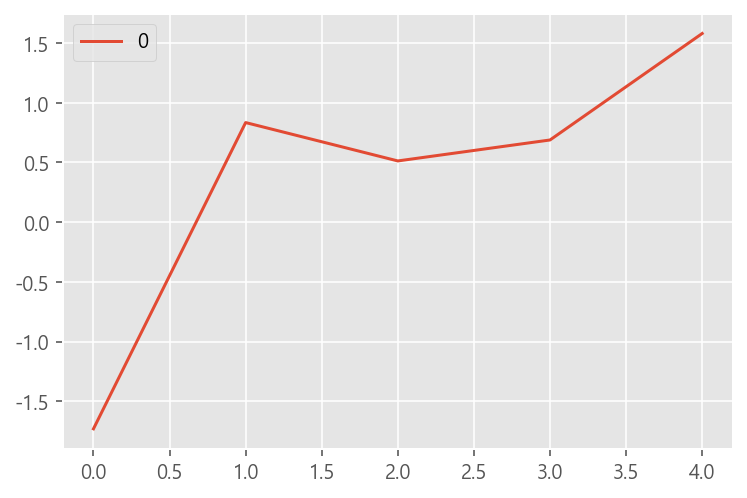

In [182]:
fig = plt.figure(figsize = (20, 8))
pd.DataFrame(comp_1_one[3])[:2000].plot()

<Figure size 432x288 with 0 Axes>

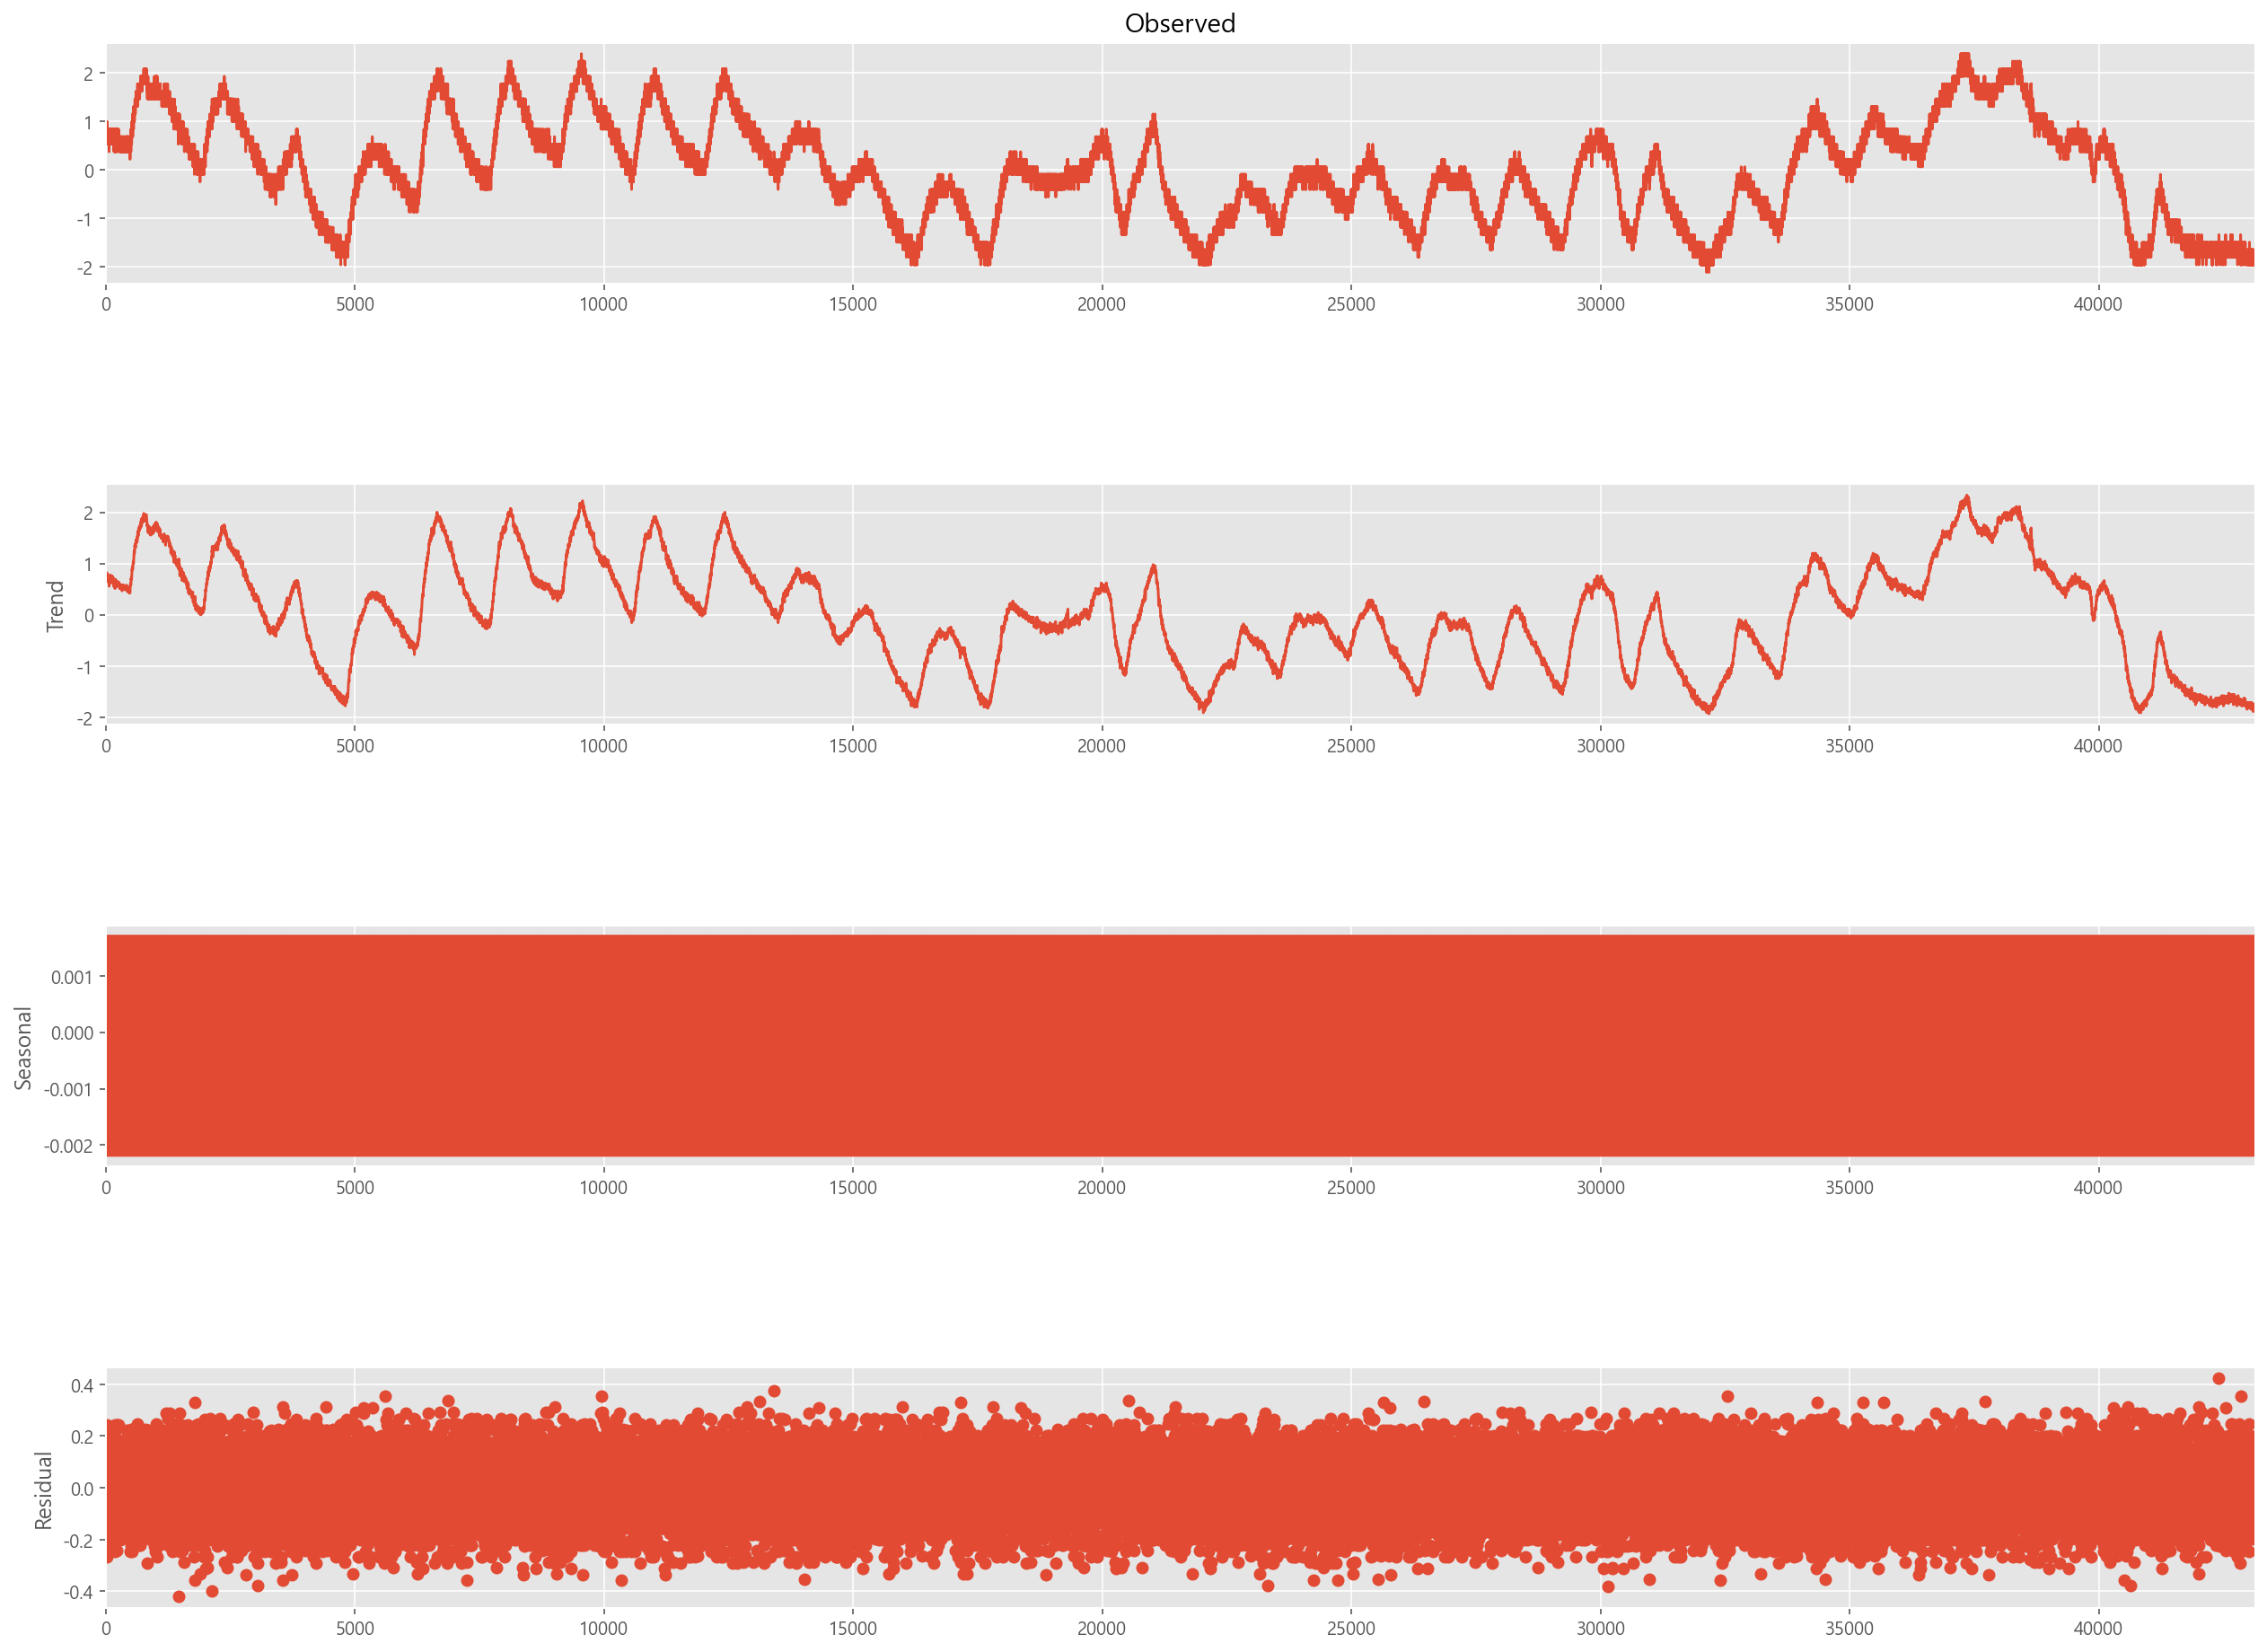

In [183]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(comp_1_one[:, 3], model = 'additive', freq = 7)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20, 15)

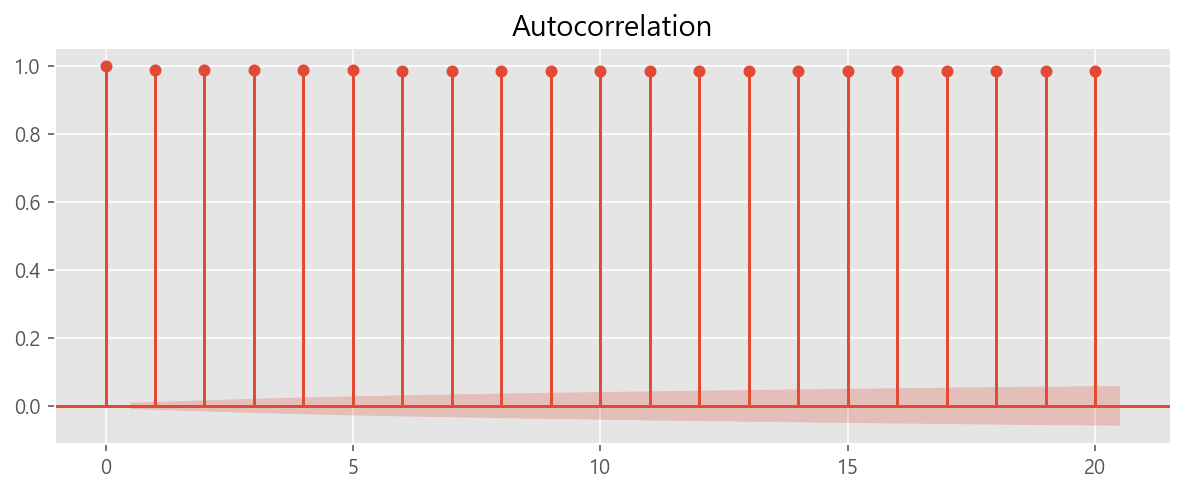

In [184]:
## 데이터가 패턴이 보인다면? -> 정상성이 의심됨 -> 판단하기 위한 ACF 그래프 시각화
import statsmodels.api as sm

fig=plt.figure(figsize=(10,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(comp_1_one[:, 3],lags=20,ax=ax1)

## 값이 아주 천천히 작아짐 -> ACF값이 천천히 감소하는 것은 정상성을 만족하지 않는다는 것을 의미

In [185]:
### ADF 검정(Augmented Dickey-Fuller test) / 단위근 검정 으로 정상성 확인
# H0(귀무가설) : 자료에 단위근이 존재한다. 즉, 정상성을 만족하지 않는다.
# H1(대립가설) : 자료가 정상성을 만족한다.

from statsmodels.tsa.stattools import adfuller

result=adfuller(comp_1_one[:, 1])
print('ADF Statistic : %f ' % result[0])
print('p-value : %f' % result[1])
print('Critical Values:')

for key,value in result[4].items():
    print('\t%s : %.3f' % (key,value))

ADF Statistic : -4.111440 
p-value : 0.000927
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567


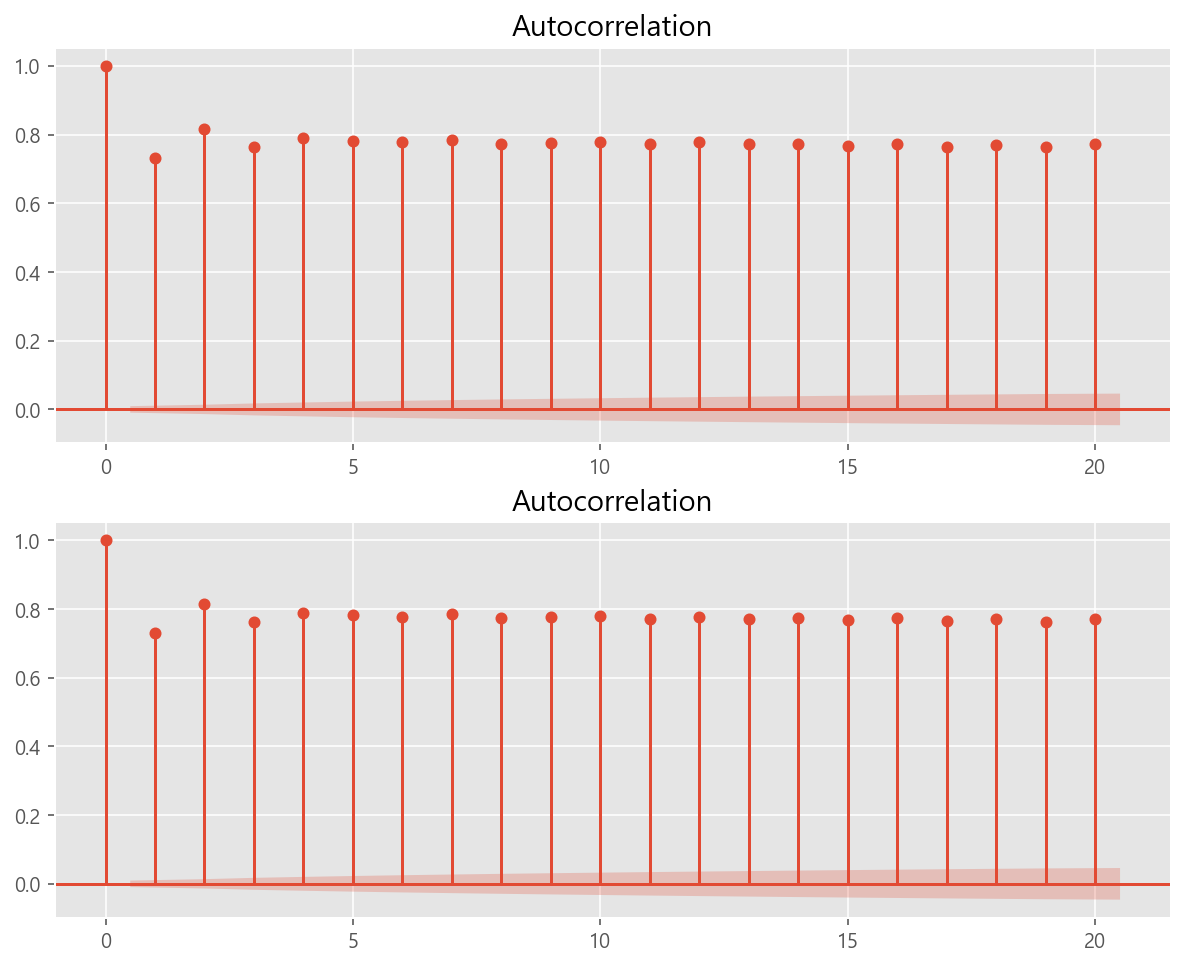

In [186]:
## 정상성을 만족하는 데이터도 ACF와 PACF 그래프를 그려 ARIMA 모형의 p와 q를 결정

import statsmodels.api as sm

fig=plt.figure(figsize=(10,8))

ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(comp_1_one[:, 1],lags=20,ax=ax1)

ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_acf(comp_1_one[:, 1],lags=20,ax=ax2)

comp_1_one = pd.DataFrame(comp_1_one)
comp_1_one.index = DATE[:43135]

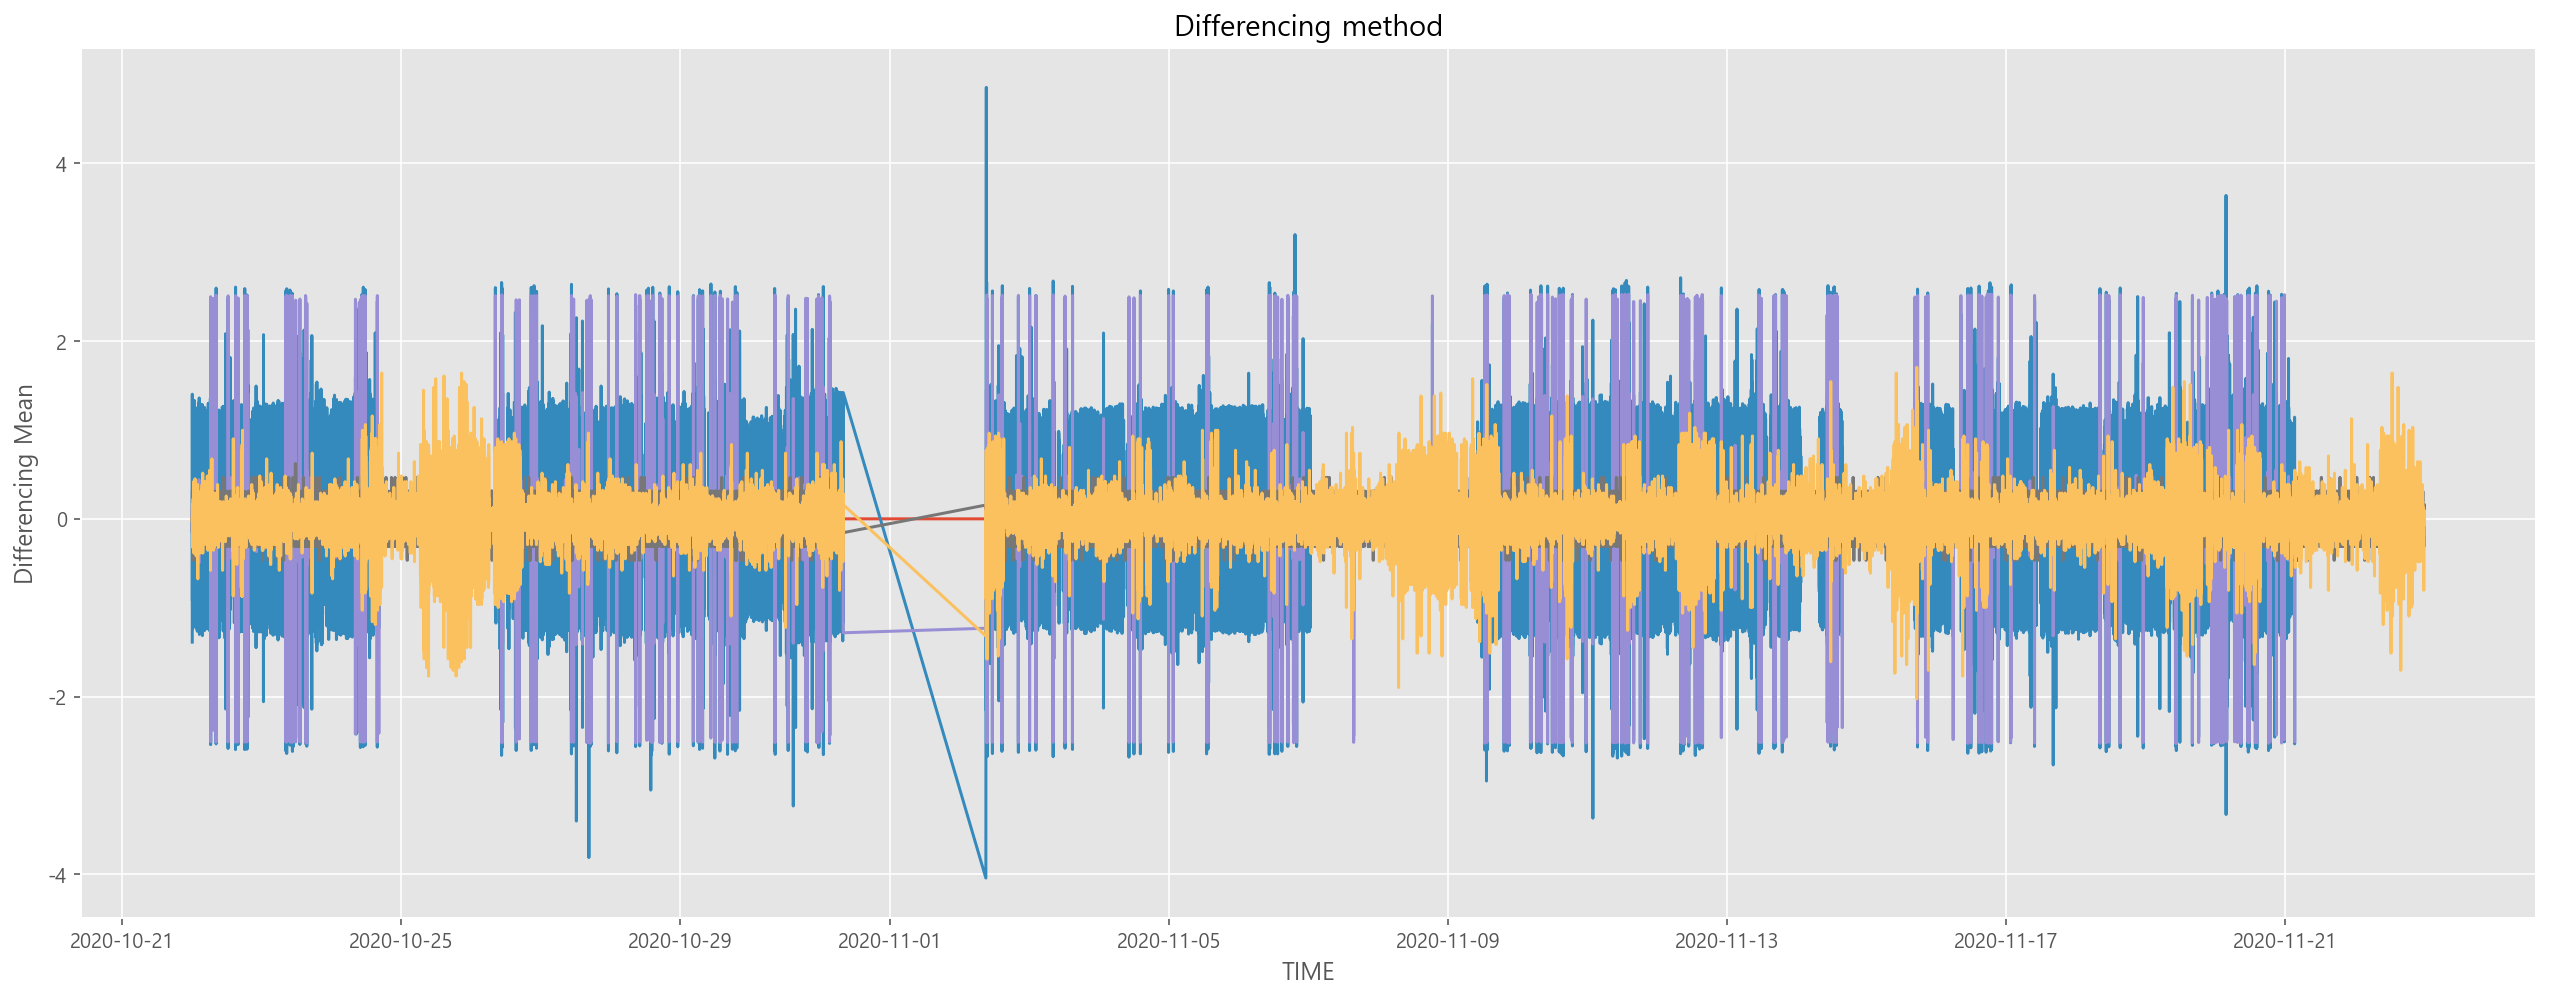

In [187]:
## 정상성을 해결하기 위한 1차 차분

comp_diff = comp_1_one - comp_1_one.shift()
plt.figure(figsize=(22,8))
plt.plot(comp_diff)
plt.title('Differencing method')
plt.xlabel('TIME')
plt.ylabel('Differencing Mean')
plt.show()

In [188]:
comp_1_one = comp_diff.values
comp_1_one = pd.DataFrame(comp_1_one)

In [189]:
comp_1_one

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,0.00008,-1.387474,-0.140046,0.000000,0.000000
2,0.00008,1.402795,0.139853,0.000000,-0.032169
3,0.00008,0.068757,-0.000230,-0.155614,0.032169
4,0.00008,-0.923363,-0.029043,0.311229,0.000000
...,...,...,...,...,...
43130,0.00008,0.000000,0.000000,-0.311229,0.000000
43131,0.00008,0.000000,0.000000,0.000000,0.000000
43132,0.00008,0.000000,0.000000,0.155614,-0.064338
43133,0.00008,0.000000,0.000000,-0.155614,0.096507


In [190]:
comp_1_one.index = TEST_DATE

In [191]:
vali = comp_1_one[1:]

In [192]:
vali[0]

TIMESTAMP
2020-10-22 00:01:22    0.00008
2020-10-22 00:02:22    0.00008
2020-10-22 00:03:22    0.00008
2020-10-22 00:04:22    0.00008
2020-10-22 00:05:22    0.00008
                        ...   
2020-11-22 23:55:35    0.00008
2020-11-22 23:56:35    0.00008
2020-11-22 23:57:35    0.00008
2020-11-22 23:58:35    0.00008
2020-11-22 23:59:35    0.00008
Name: 0, Length: 43134, dtype: float64

In [193]:
# read test data
x1_test = vali[0].values
x2_test = vali[1].values
x3_test = vali[2].values
y_test = vali[3].values # no need to scale
# convert to [rows, columns] structure
x1_test = x1_test.reshape((len(x1_test), 1))
x2_test = x2_test.reshape((len(x2_test), 1))
x3_test = x3_test.reshape((len(x3_test), 1))
y_test = y_test.reshape((len(y_test), 1))
x1_test_scaled = scaler.fit_transform(x1_test)
x2_test_scaled = scaler.fit_transform(x2_test)
x3_test_scaled = scaler.fit_transform(x3_test)

In [194]:
x1_test.shape

(43134, 1)

In [195]:
def prep_data(x1_test_scaled , x2_test_scaled , x3_test_scaled , test_y , start , end , last):
    #prepare test data X
    dataset_test = hstack((x1_test_scaled, x2_test_scaled, x3_test_scaled))
    dataset_test_X = dataset_test[start:end, :]
    print("dataset_test_X :",dataset_test_X.shape)
    test_X_new = dataset_test_X.reshape(1,dataset_test_X.shape[0],dataset_test_X.shape[1])
    print("test_X_new :",test_X_new.shape)
    #prepare past and groundtruth
    past_data = test_y[:end , :]
    dataset_test_y = test_y[end:last , :]
    scaler1 = MinMaxScaler(feature_range=(0, 1))
    scaler1.fit(dataset_test_y)
    print("dataset_test_y :",dataset_test_y.shape)
    print("past_data :",past_data.shape)
    #predictions
    y_pred = model.predict(test_X_new)
    y_pred_inv = scaler1.inverse_transform(y_pred)
    y_pred_inv = y_pred_inv.reshape(n_steps_out,1)    
    y_pred_inv = y_pred_inv[:,0]    
    print("y_pred :",y_pred.shape)
    print("y_pred_inv :",y_pred_inv.shape)
    
    return y_pred_inv , dataset_test_y , past_data
#start can be any point in the test data (1258)
start = 5670
end = start + n_steps_in 
last = end + n_steps_out 
y_pred_inv , dataset_test_y , past_data = prep_data(x1_test , x2_test , x3_test ,y_test , start , end , last)

dataset_test_X : (60, 3)
test_X_new : (1, 60, 3)
dataset_test_y : (30, 1)
past_data : (5730, 1)
y_pred : (1, 30)
y_pred_inv : (30,)


In [196]:
# Calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name , start , end):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print("Test Data from {} to {}".format(start, end))
    print('Mean Absolute Error: {:.2f}'.format(mae))
    print('Root Mean Square Error: {:.2f}'.format(rmse))
    print('')
    print('')
evaluate_prediction(y_pred_inv , dataset_test_y, 'LSTM' , start , end)

Test Data from 5670 to 5730
Mean Absolute Error: 0.14
Root Mean Square Error: 0.17




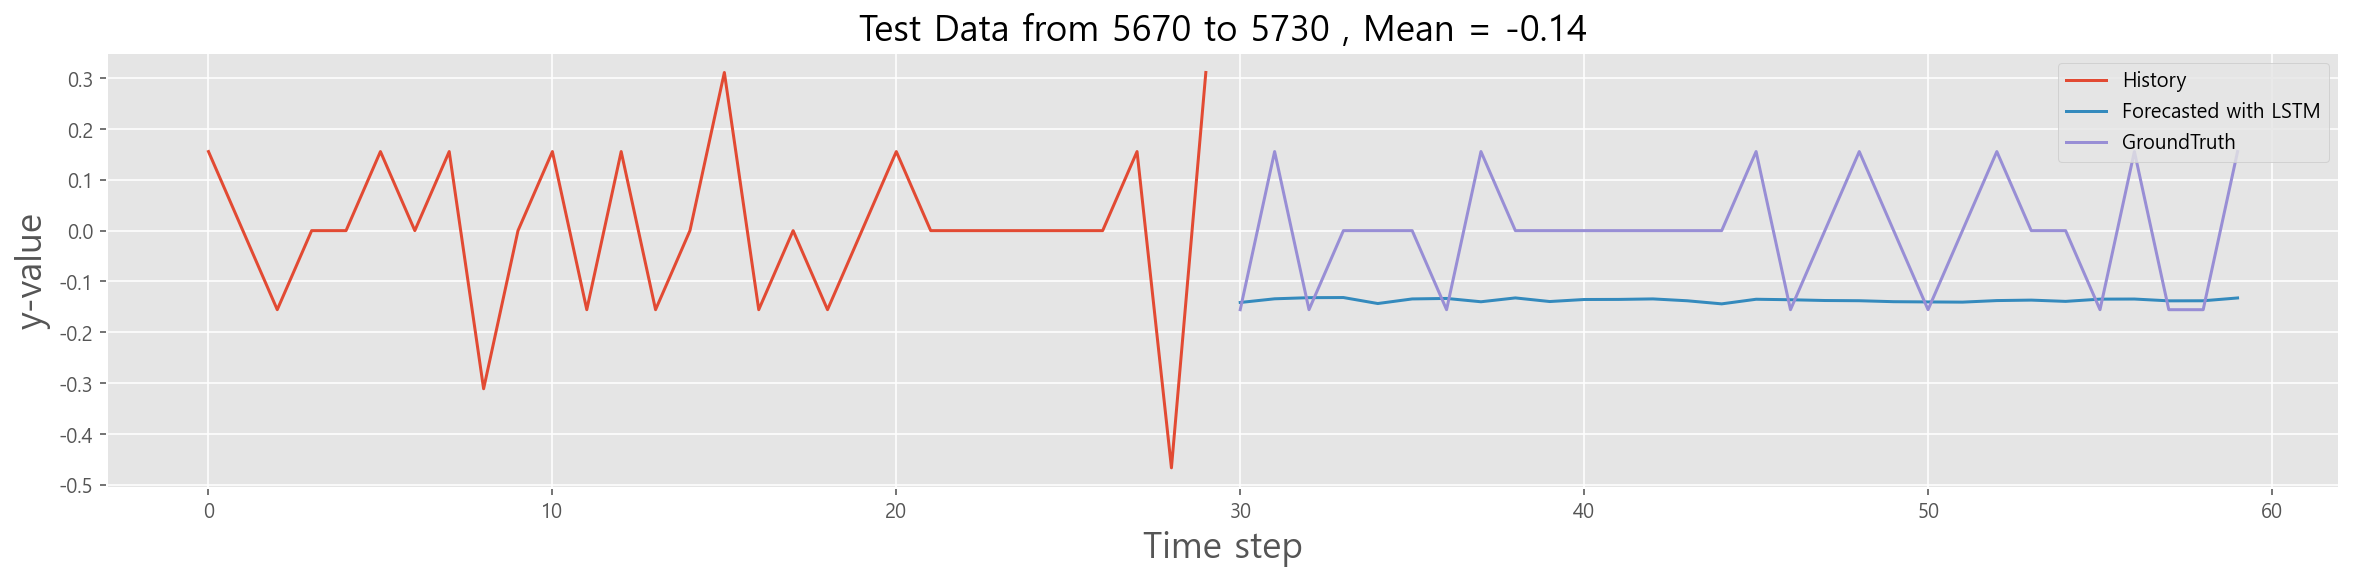

In [197]:
# Plot history and future
def plot_multistep(history, prediction1 , groundtruth , start , end):
    plt.figure(figsize=(20, 4))
    y_mean = mean(prediction1)
    range_history = len(history)
    range_future = list(range(range_history, range_history + len(prediction1)))
    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future, np.array(prediction1),label='Forecasted with LSTM')
    plt.plot(range_future, np.array(groundtruth),label='GroundTruth')
    plt.legend(loc='upper right')
    plt.title("Test Data from {} to {} , Mean = {:.2f}".format(start, end, y_mean) ,  fontsize=18)
    plt.xlabel('Time step' ,  fontsize=18)
    plt.ylabel('y-value' , fontsize=18)
plot_multistep(past_data[5700:], y_pred_inv , dataset_test_y , start , end)